### Import package

In [1]:
import pandas as pd 
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Algoritma K-Means Clustering

In [31]:
df = df.rename(columns={"Annual Income (k$)":"Pendapatan", "Spending Score (1-100)":"Pengeluaran"})

points = df[['Pendapatan', 'Pengeluaran']]
points = points.values

In [32]:
model = KMeans(n_clusters=5)
model.fit(points)

KMeans(n_clusters=5)

In [33]:
y = model.fit_predict(points)

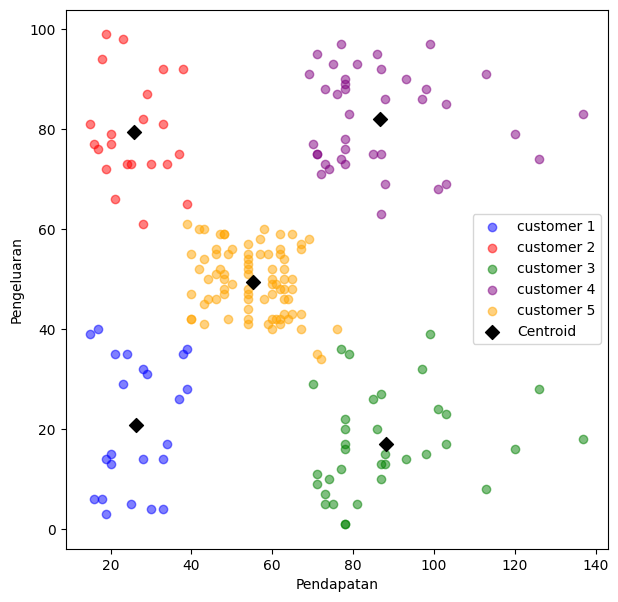

In [34]:
# xs = points.iloc[:,0]
# ys = points.iloc[:,1]

centroids = model.cluster_centers_ 

centroid_x = centroids[:,0]
centroid_y = centroids[:,1]

plt.figure(figsize=(7, 7))
plt.scatter(points[y==0,0], points[y==0,1], c='blue', label="customer 1", alpha=0.5)
plt.scatter(points[y==1,0], points[y==1,1], c='red', label="customer 2", alpha=0.5)
plt.scatter(points[y==2,0], points[y==2,1], c='green', label="customer 3", alpha=0.5)
plt.scatter(points[y==3,0], points[y==3,1], c='purple', label="customer 4", alpha=0.5)
plt.scatter(points[y==4,0], points[y==4,1], c='orange', label="customer 5", alpha=0.5)

plt.scatter(centroid_x, centroid_y, marker="D", s=50, label="Centroid", c='black')
plt.xlabel("Pendapatan")
plt.ylabel("Pengeluaran")
plt.legend()
plt.show()

#### Mencari jumlah cluster yg paling bagus

In [16]:
cluster = range(1, 7)
inertias = []

for n in cluster: 
    model = KMeans(n_clusters=n)
    model.fit(points)
    inertias.append(model.inertia_)

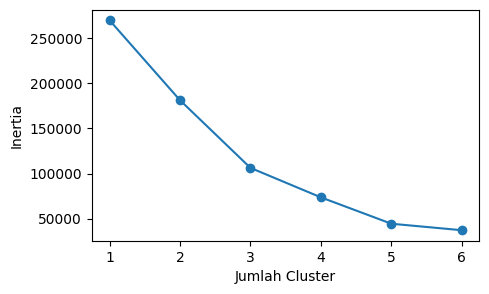

In [18]:
plt.figure(figsize=(5, 3))
plt.plot(cluster, inertias, '-o')
plt.xlabel("Jumlah Cluster")
plt.ylabel("Inertia")
plt.xticks(cluster)
plt.show()

### Algoritma Hierarchical Clustering

In [36]:
from scipy.cluster.hierarchy import dendrogram, linkage, complete

In [47]:
linkage_hr = linkage(points, method='ward')
complete_hr = complete(points)

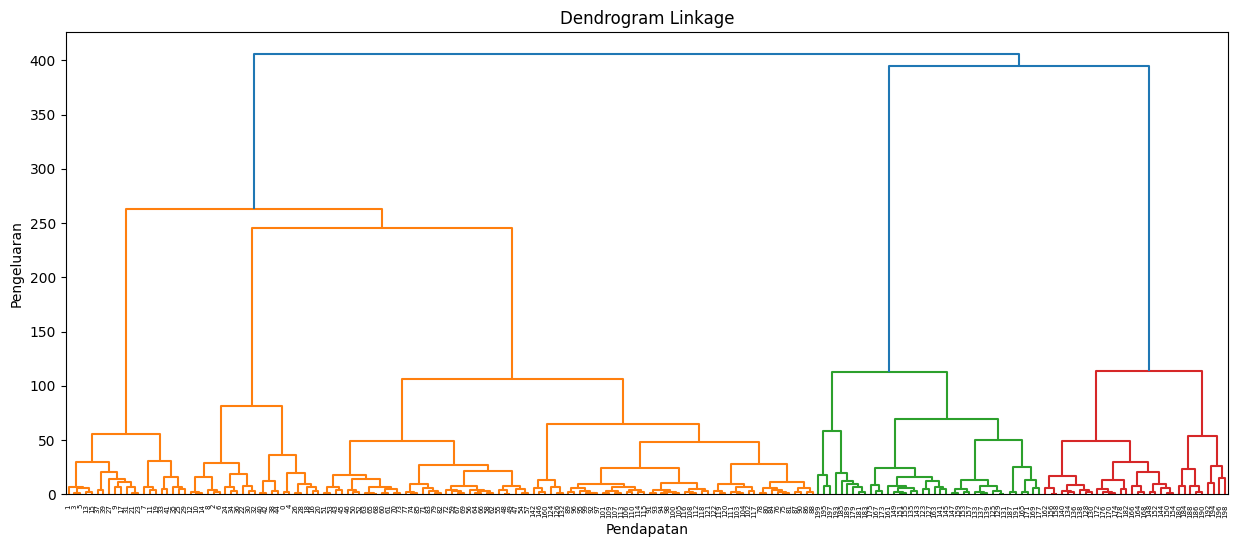

In [48]:
plt.figure(figsize=(15,6))
dendrogram(linkage_hr)
plt.title("Dendrogram Linkage")
plt.xlabel("Pendapatan")
plt.ylabel("Pengeluaran")
plt.show()

In [41]:
from sklearn.cluster import AgglomerativeClustering

In [44]:
hr_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

In [45]:
hr_predict = hr_cluster.fit_predict(points)

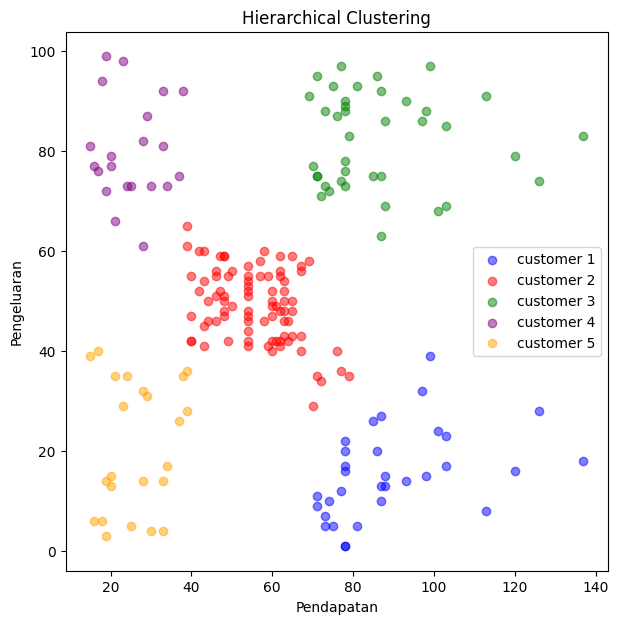

In [49]:
plt.figure(figsize=(7, 7))
plt.scatter(points[hr_predict==0,0], points[hr_predict==0,1], c='blue', label="customer 1", alpha=0.5)
plt.scatter(points[hr_predict==1,0], points[hr_predict==1,1], c='red', label="customer 2", alpha=0.5)
plt.scatter(points[hr_predict==2,0], points[hr_predict==2,1], c='green', label="customer 3", alpha=0.5)
plt.scatter(points[hr_predict==3,0], points[hr_predict==3,1], c='purple', label="customer 4", alpha=0.5)
plt.scatter(points[hr_predict==4,0], points[hr_predict==4,1], c='orange', label="customer 5", alpha=0.5)

plt.title("Hierarchical Clustering")
plt.xlabel("Pendapatan")
plt.ylabel("Pengeluaran")
plt.legend()
plt.show()